In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [10]:
df_counts = pd.read_csv('./Celltypist/Celltypist_predicted_cell_types_counts.csv')
print(df_counts.head())

normalized_counts = df_counts.set_index('Cell Type pred')[['SC', 'ENACT','B2C', 'Xseg']].div(
    df_counts[['SC', 'ENACT','B2C', 'Xseg']].sum()
)
import json

# Create a cell type map by mapping each label to its prefix (before the first underscore)
with open('./Celltypist/cell_type_map_VpX.json', 'r') as f:
    cell_type_map = json.load(f)

# Add a column for the broad/general cell type
df_counts['Broad_Cell_Type'] = df_counts['Cell Type pred'].map(cell_type_map).fillna(df_counts['Cell Type pred'])

# Aggregate the counts by the new broad/general cell types
aggregated_counts = df_counts.groupby('Broad_Cell_Type')[['SC', 'ENACT','B2C', 'Xseg']].sum()

normalized_aggregated = aggregated_counts.div(aggregated_counts.sum())

  Cell Type pred      SC    ENACT      B2C     Xseg
0           AT1   2966.0   2235.0   1521.0    734.0
1            AT2  7025.0  18365.0  18117.0  14836.0
2       B_memory  3076.0  16910.0  13919.0  11810.0
3        B_naive   319.0     93.0     47.0     38.0
4   B_plasma_IgA  1356.0   5188.0   3735.0   2781.0


In [11]:
# Load the new dataframe
df_new = pd.read_csv('./Classical Annotation/cell_type_proportions.csv')

# Map the cell_type labels to the broad/general cell types using cell_type_map
df_new['Broad_Cell_Type'] = df_new['cell_type'].map(cell_type_map).fillna(df_new['cell_type'])

# Set index to Broad_Cell_Type for alignment
df_new_indexed = df_new.set_index('Broad_Cell_Type')

# Append the proportion column to normalized_aggregated
normalized_aggregated['Sota on Enact'] = df_new_indexed['proportion']

print(normalized_aggregated.head())

                       SC     ENACT       B2C      Xseg  Sota on Enact
Broad_Cell_Type                                                       
AT1              0.024520  0.011851  0.007846  0.003895       0.020719
AT2              0.058077  0.097377  0.093456  0.078738       0.152599
B                0.051488  0.166552  0.130922  0.112757       0.389679
Basal            0.004340  0.021379  0.018983  0.014850       0.067158
CD4              0.163243  0.106763  0.102256  0.094511       0.000000


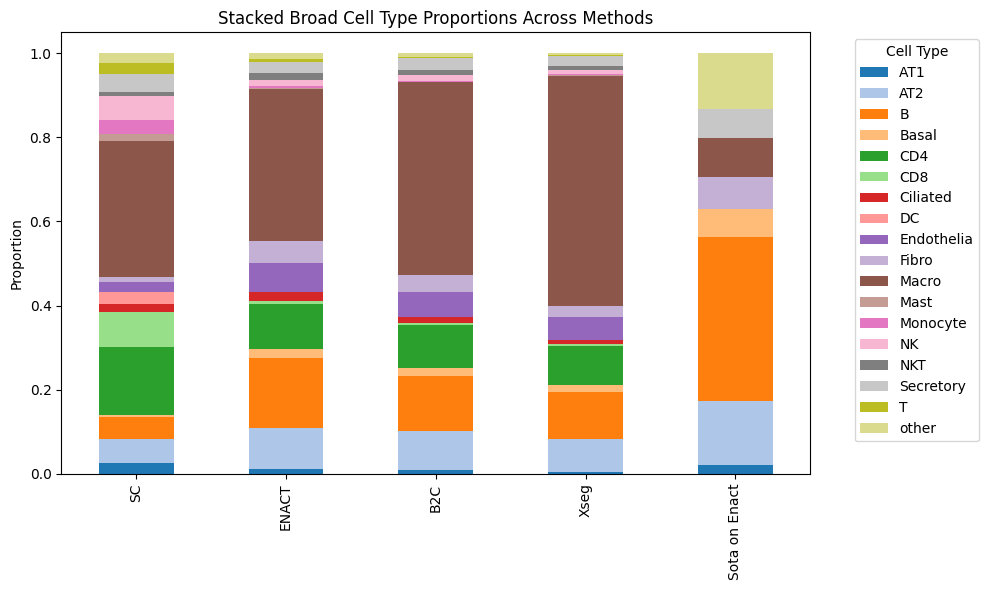

In [ ]:
# Plot stacked bar chart for broad cell type proportions
colors = plt.cm.tab20.colors  # Use a colormap with enough distinct colors
cell_types =np.sort(normalized_aggregated.index)
methods = normalized_aggregated.columns

# Assign a color to each cell type
color_map = {cell_type: colors[i % len(colors)] for i, cell_type in enumerate(cell_types)}

ax = normalized_aggregated.T.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=[color_map[ct] for ct in cell_types]
)

plt.ylabel('Proportion')
plt.title('Cell Type Proportions Across Methods')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()